# RiverLevelForecastRSL
Este estudo visa prever o nível do Rio do Sul com base em variáveis hidrometeorológicas por meio de um modelo de regressão linear multivariada implementado em Python. As variáveis utilizadas incluem níveis e volumes de chuva das cidades de Ituporanga e Taió, consideradas influentes na bacia hidrográfica da região.

[GitHub](https://github.com/Pedro-IFC/RiverLevelForecastRSL)

In [1]:
from unidecode import unidecode
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import numpy as np

# Função de exportação do joblib

In [2]:
import joblib
def makeJoblib(regre, name): 
    joblib.dump(regre, "./models/"+name+'.pkl')

# Importação dos dados

In [3]:
dataset = pd.read_csv('dataset.csv')
dataset.head()

,NivelRiodoSul,NívelItuporanga,ChuvaItuporanaga,NívelTaió,ChuvaTaió
0,"170,0","30,0","3,0","98,0","0,0"
1,"170,0","39,0","12,0","98,0","0,0"
2,"169,0","59,0","19,0","98,0","0,0"
3,"169,0","82,0","5,0","98,0","0,0"
4,"169,0","27,0","1,0","97,0","0,0"


In [4]:
dataset.describe

<bound method NDFrame.describe of       NivelRiodoSul NívelItuporanga ChuvaItuporanaga NívelTaió ChuvaTaió
0             170,0            30,0              3,0      98,0       0,0
1             170,0            39,0             12,0      98,0       0,0
2             169,0            59,0             19,0      98,0       0,0
3             169,0            82,0              5,0      98,0       0,0
4             169,0            27,0              1,0      97,0       0,0
...             ...             ...              ...       ...       ...
65403         189,0            69,0              0,0     142,0       0,0
65404         176,0            54,0              0,0     152,0       0,0
65405         177,0            55,0              0,0     152,0       0,0
65406         177,0            55,0              0,0     151,0       0,0
65407         178,0            56,0              0,0     151,0       0,0

[65408 rows x 5 columns]>

In [5]:
dataset.dtypes

NivelRiodoSul       object
NívelItuporanga     object
ChuvaItuporanaga    object
NívelTaió           object
ChuvaTaió           object
dtype: object

# Limpeza dos dados

In [6]:
dataset.columns = [unidecode(col) for col in dataset.columns]
dataset = dataset.map(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x)
dataset = dataset.apply(pd.to_numeric, errors='coerce')

In [7]:
dataset.head()

,NivelRiodoSul,NivelItuporanga,ChuvaItuporanaga,NivelTaio,ChuvaTaio
0,170.0,30.0,3.0,98.0,0.0
1,170.0,39.0,12.0,98.0,0.0
2,169.0,59.0,19.0,98.0,0.0
3,169.0,82.0,5.0,98.0,0.0
4,169.0,27.0,1.0,97.0,0.0


In [8]:
dataset.dtypes

NivelRiodoSul       float64
NivelItuporanga     float64
ChuvaItuporanaga    float64
NivelTaio           float64
ChuvaTaio           float64
dtype: object

In [9]:
dataset = dataset.dropna()

In [10]:
dataset = dataset.drop_duplicates()

# Análise exploratória

In [11]:
dataset.describe()

,NivelRiodoSul,NivelItuporanga,ChuvaItuporanaga,NivelTaio,ChuvaTaio
count,40277.000000,40277.000000,40277.000000,40277.000000,40277.000000
mean,244.644239,71.920178,0.084480,223.151997,0.066584
std,141.962868,45.838199,0.960258,169.704250,0.592250
min,90.000000,8.000000,0.000000,46.000000,0.000000
25%,146.000000,43.000000,0.000000,100.000000,0.000000
50%,199.000000,57.000000,0.000000,160.000000,0.000000
75%,297.000000,84.000000,0.000000,282.000000,0.000000
max,1240.000000,512.000000,140.600000,975.000000,48.000000


array([[<Axes: title={'center': 'NivelRiodoSul'}>,
        <Axes: title={'center': 'NivelItuporanga'}>],
       [<Axes: title={'center': 'ChuvaItuporanaga'}>,
        <Axes: title={'center': 'NivelTaio'}>],
       [<Axes: title={'center': 'ChuvaTaio'}>, <Axes: >]], dtype=object)

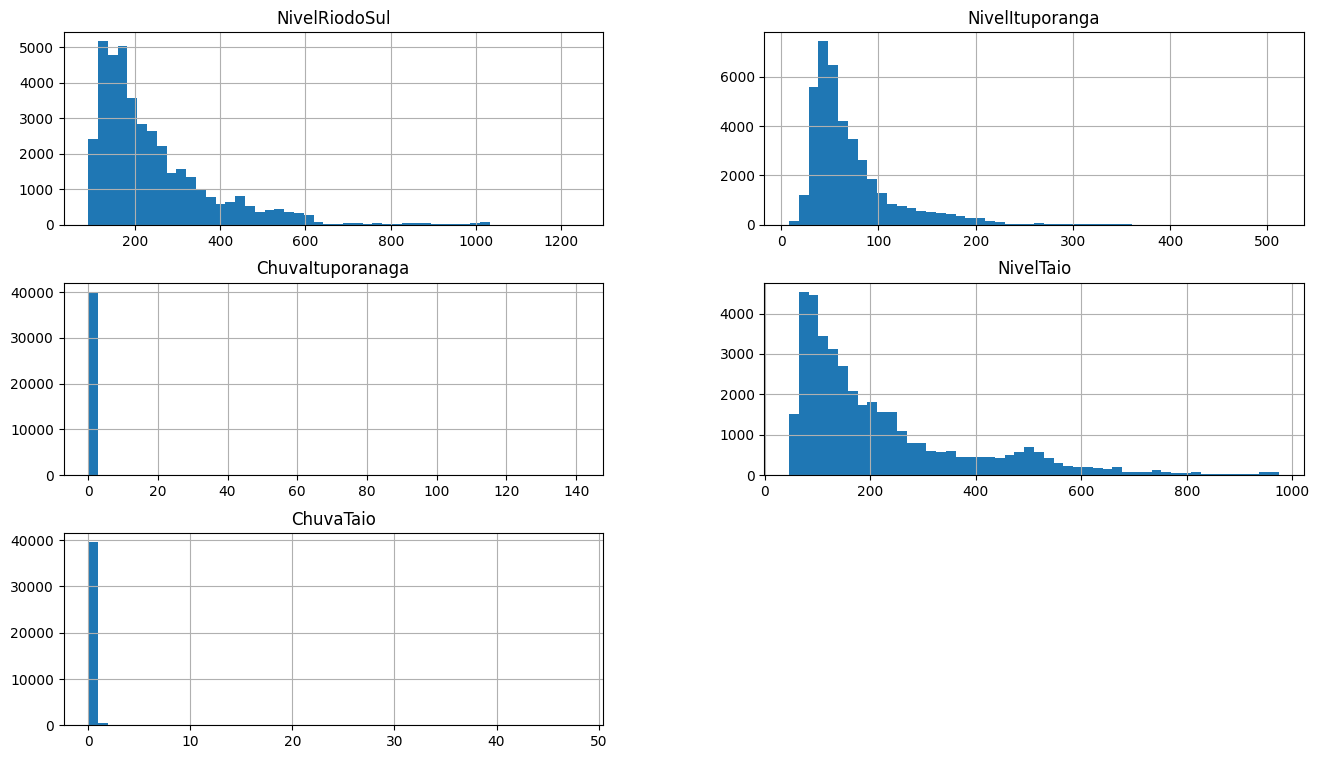

In [12]:
dataset[['NivelRiodoSul', 'NivelItuporanga', 'ChuvaItuporanaga', 'NivelTaio', 'ChuvaTaio']].hist(bins=50, figsize=(16, 9))

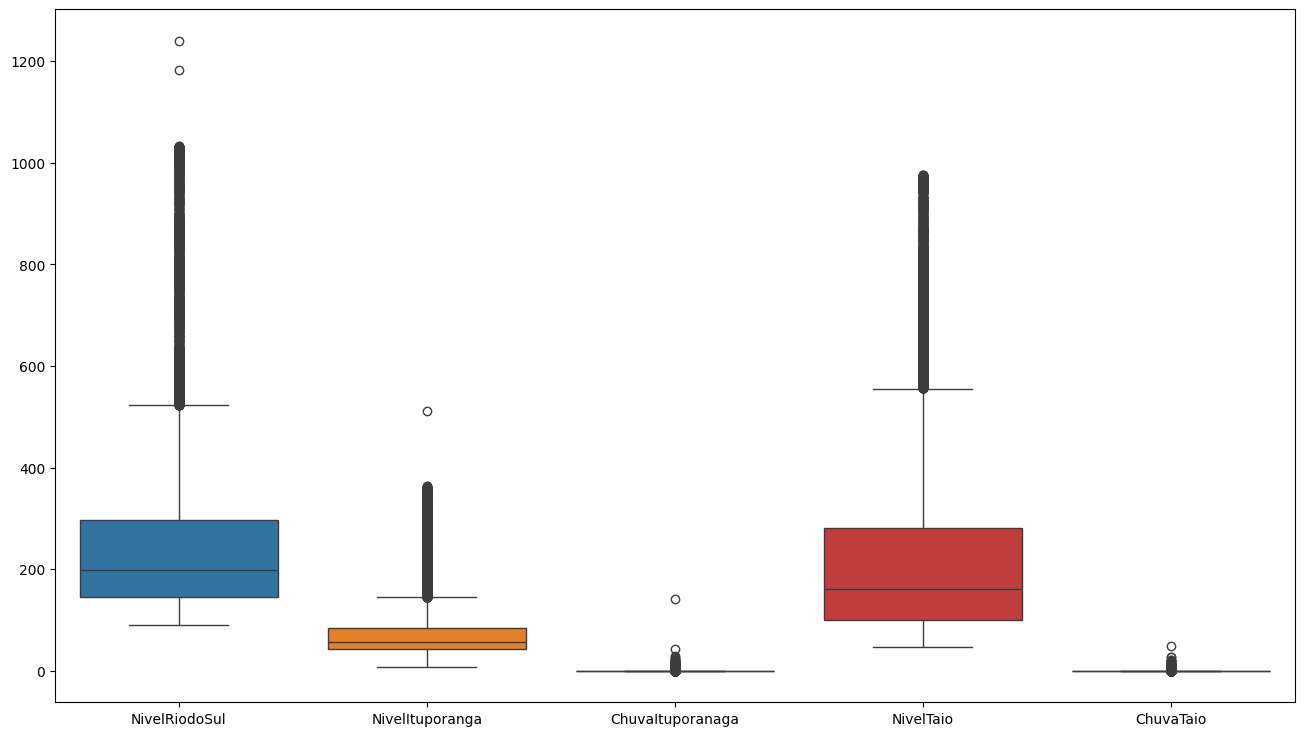

In [13]:
plt.figure(figsize=(16, 9))
sns.boxplot(data=dataset[['NivelRiodoSul', 'NivelItuporanga', 'ChuvaItuporanaga', 'NivelTaio', 'ChuvaTaio']])
plt.show()

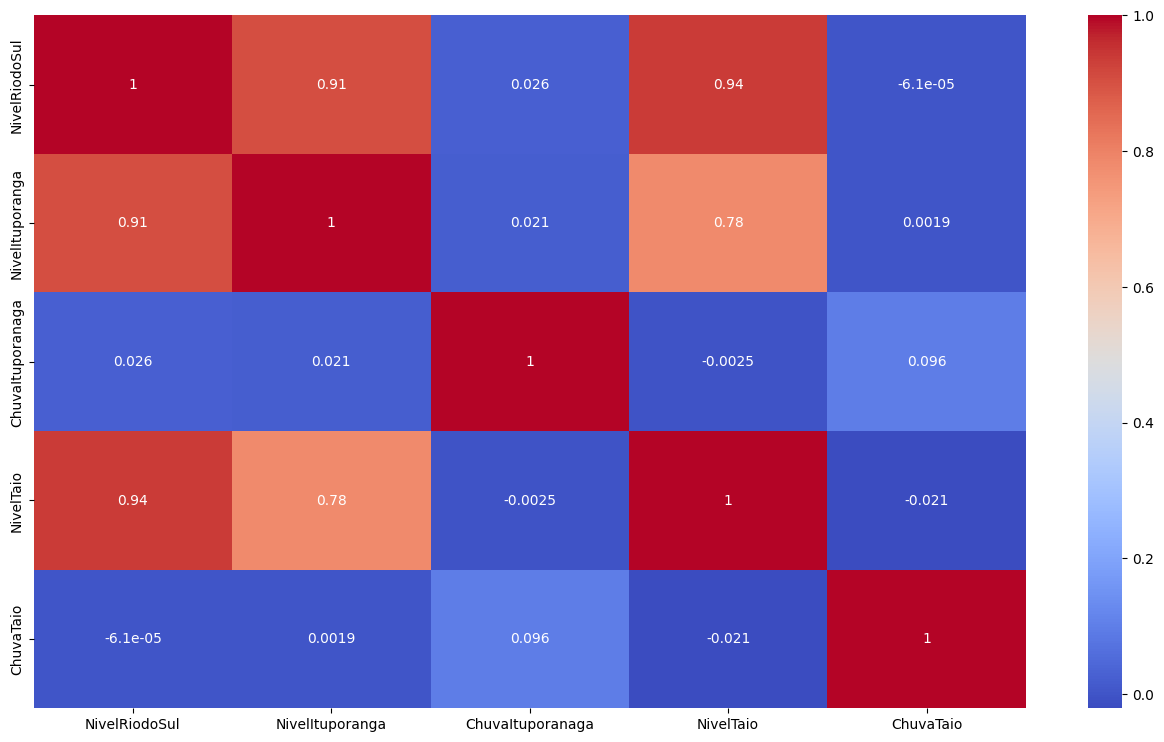

In [14]:
plt.figure(figsize=(16, 9))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.show()

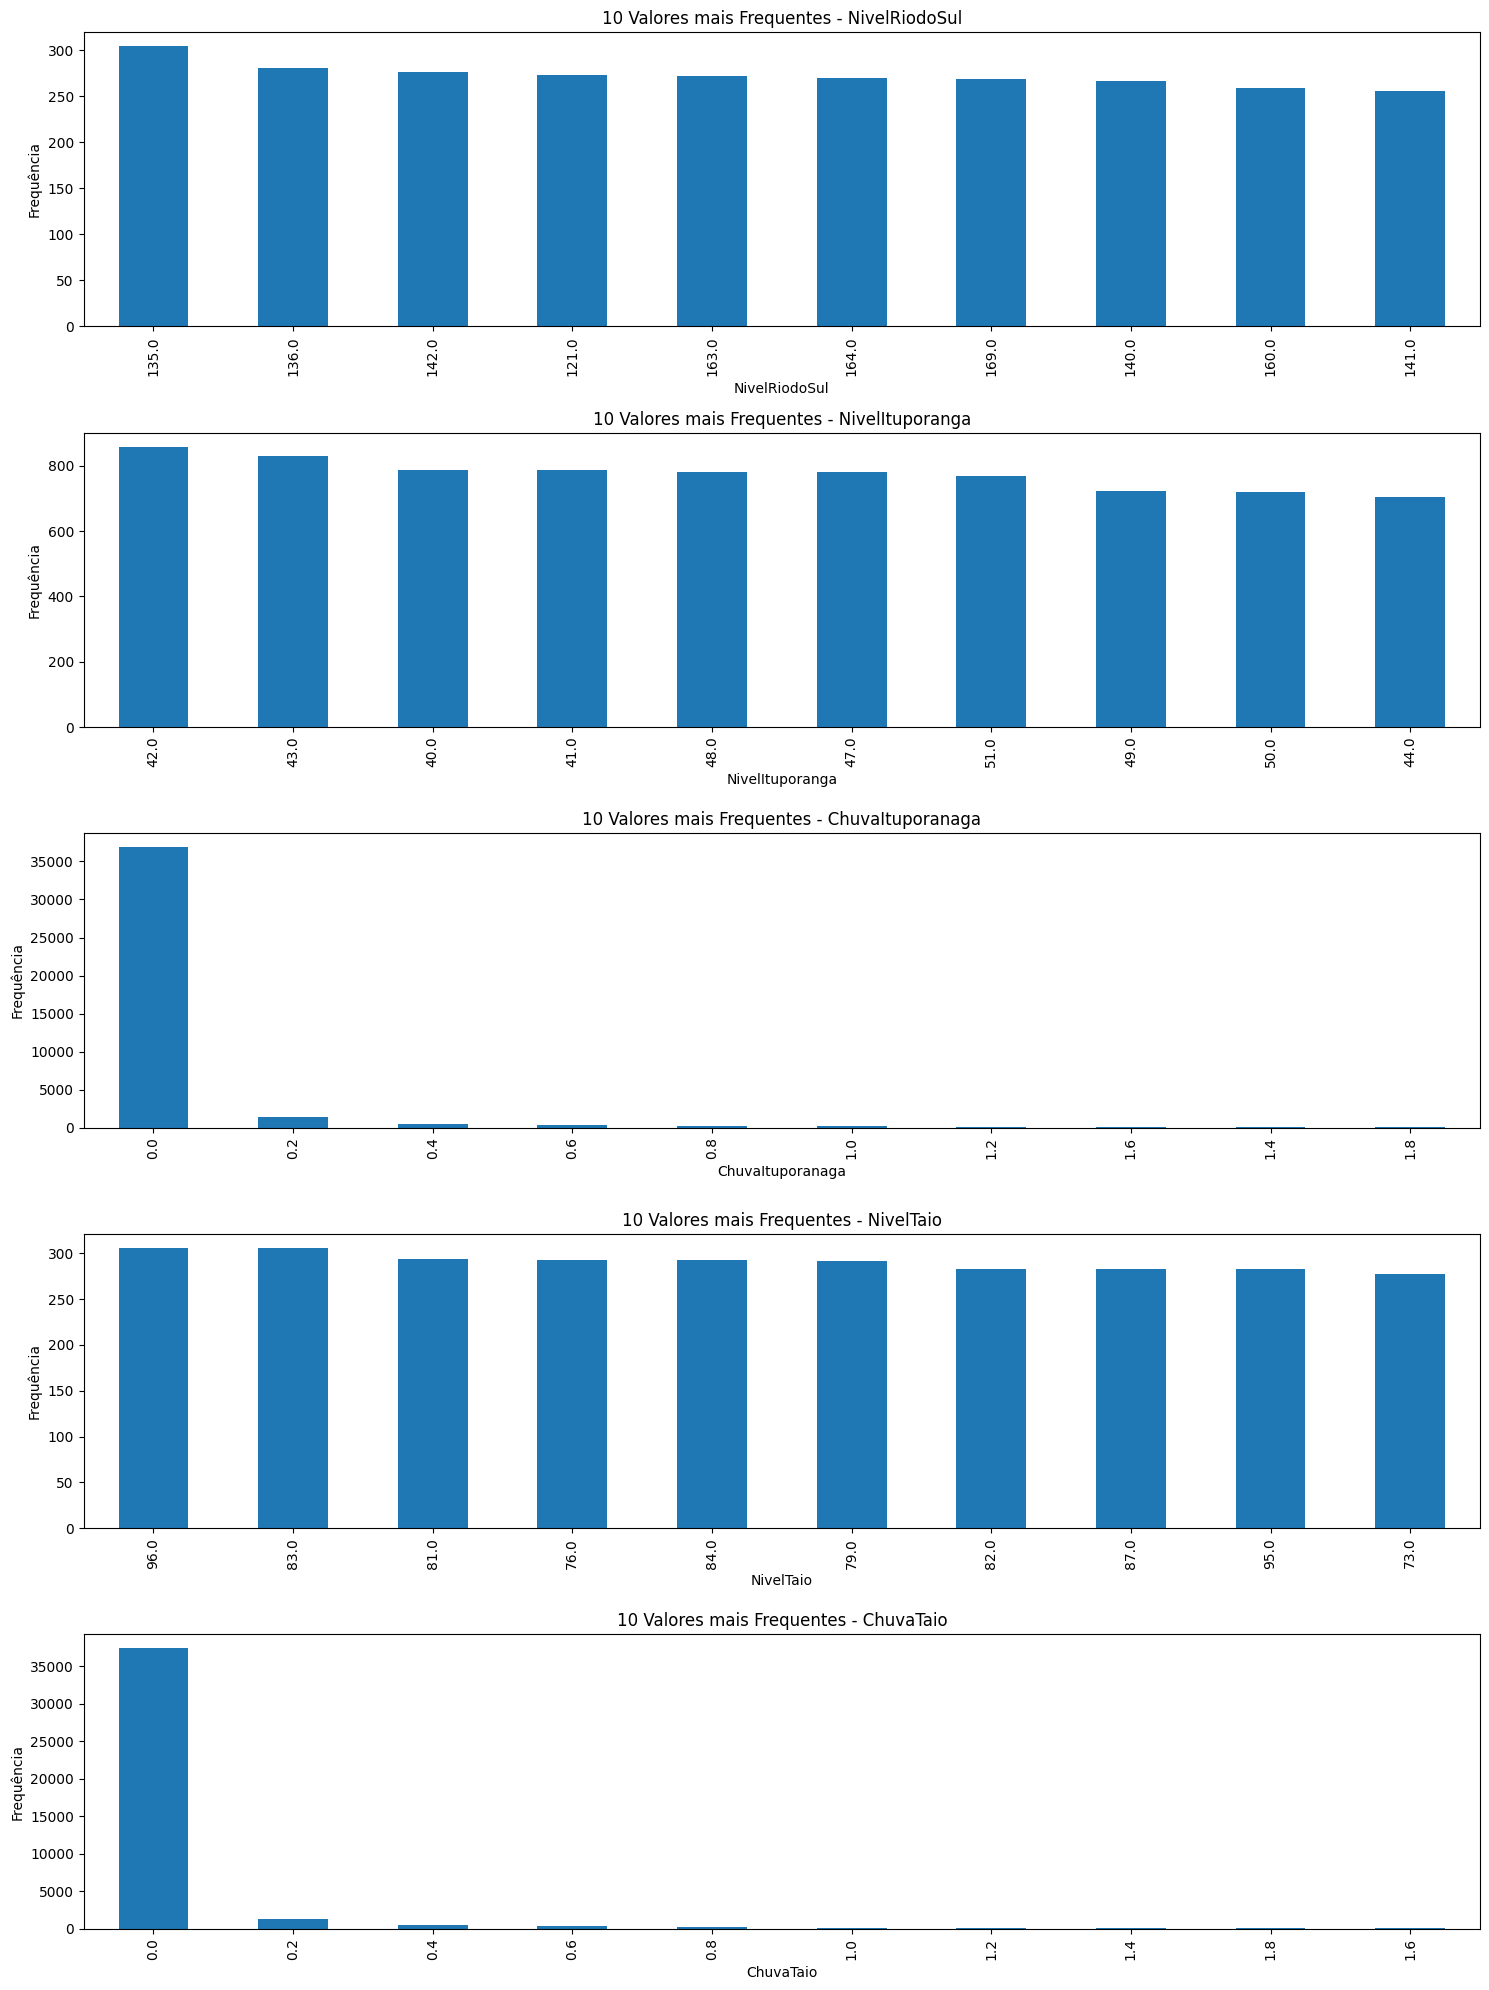

In [15]:
colunas = ['NivelRiodoSul', 'NivelItuporanga', 'ChuvaItuporanaga', 'NivelTaio', 'ChuvaTaio']

plt.figure(figsize=(15, 20))

for i, coluna in enumerate(colunas, 1):
    plt.subplot(len(colunas), 1, i)
    dataset[coluna].value_counts().head(10).plot(kind='bar')
    plt.title(f'10 Valores mais Frequentes - {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

# Treinamento

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.metrics import r2_score

## Subset 1

In [17]:
x = dataset[['NivelItuporanga', 'ChuvaItuporanaga', 'NivelTaio', 'ChuvaTaio']]
y = dataset['NivelRiodoSul']
x_minmax = scaler.fit_transform(x)
x_train, x_test, y_train, y_test  = train_test_split(x_minmax, y, train_size = 0.8, random_state=42)

In [18]:
regressao = LinearRegression()
regressao.fit(x_train, y_train)
makeJoblib(regressao, "all")

In [19]:
previsao = regressao.predict(x_test)

In [20]:
print("Coeficientes:", regressao.coef_)
print("Intercepto:", regressao.intercept_)

Coeficientes: [689.10127851 339.14704289 461.62004113 124.25280702]
Intercepto: 68.76791884414422


### Avaliação do modelo

In [21]:
r2_score(y_test, previsao)

0.9571144306461289

In [22]:
mean_absolute_error(y_test, previsao)

18.301788797755624

In [23]:
np.sqrt(mean_squared_error(y_test, previsao))

np.float64(28.920363215337787)

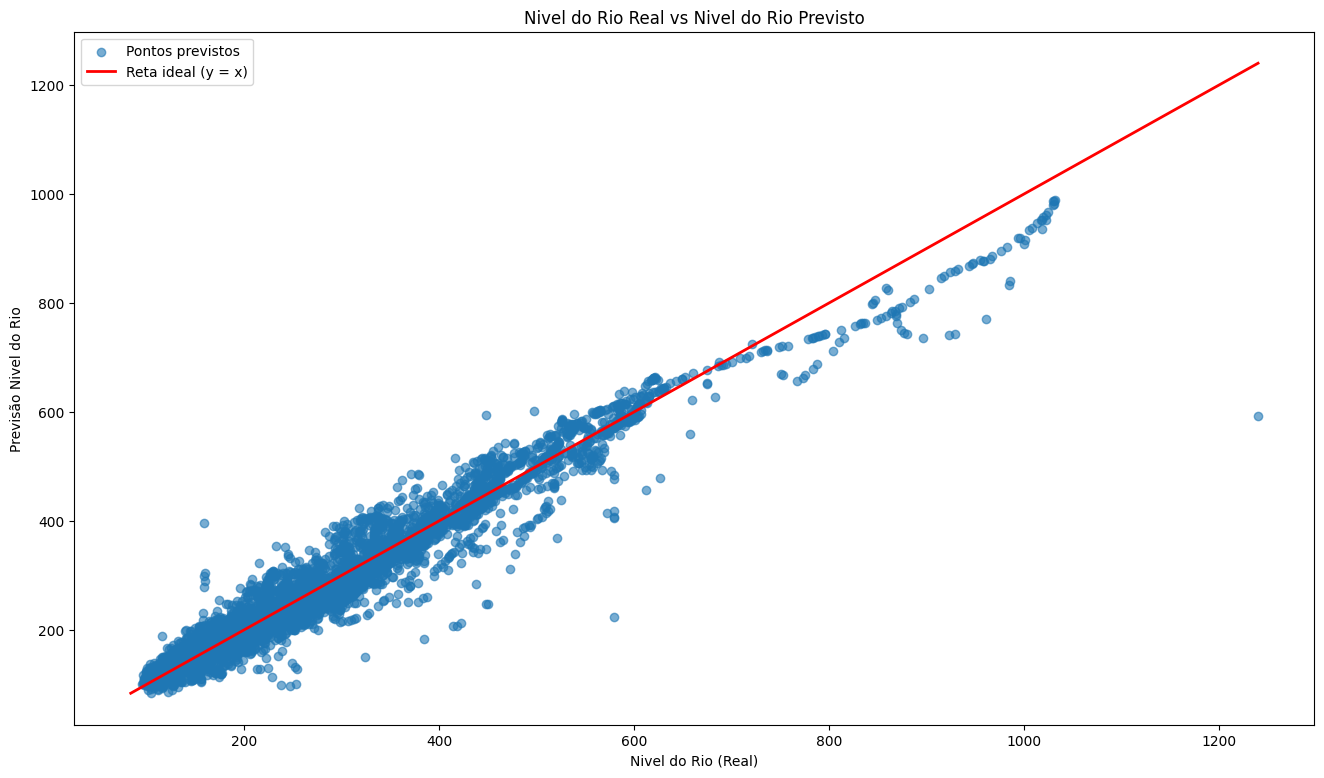

In [24]:
plt.figure(figsize=(16, 9))
plt.scatter(y_test, previsao, label='Pontos previstos', alpha=0.6)

min_val = min(min(y_test), min(previsao))
max_val = max(max(y_test), max(previsao))
x_line = np.linspace(min_val, max_val, 100)
y_line = x_line 

plt.plot(x_line, y_line, color='red', label='Reta ideal (y = x)', linewidth=2)

plt.xlabel('Nivel do Rio (Real)')
plt.ylabel('Previsão Nivel do Rio')
plt.title('Nivel do Rio Real vs Nivel do Rio Previsto')
plt.legend()
plt.show()

## Subset 2

In [25]:
x = dataset[['NivelItuporanga', 'NivelTaio']]
y = dataset['NivelRiodoSul']
x_minmax = scaler.fit_transform(x)
x_train, x_test, y_train, y_test  = train_test_split(x_minmax, y, train_size = 0.8, random_state=42)

In [26]:
regressao = LinearRegression()
regressao.fit(x_train, y_train)
makeJoblib(regressao, "only_niveis")

In [27]:
previsao = regressao.predict(x_test)

In [28]:
print("Coeficientes:", regressao.coef_)
print("Intercepto:", regressao.intercept_)

Coeficientes: [691.3816893  460.51455952]
Intercepto: 69.06040536721198


### Avaliação do modelo

In [29]:
r2_score(y_test, previsao)

0.9567009985526571

In [30]:
mean_absolute_error(y_test, previsao)

18.372043668138932

In [31]:
np.sqrt(mean_squared_error(y_test, previsao))

np.float64(29.059430133138417)

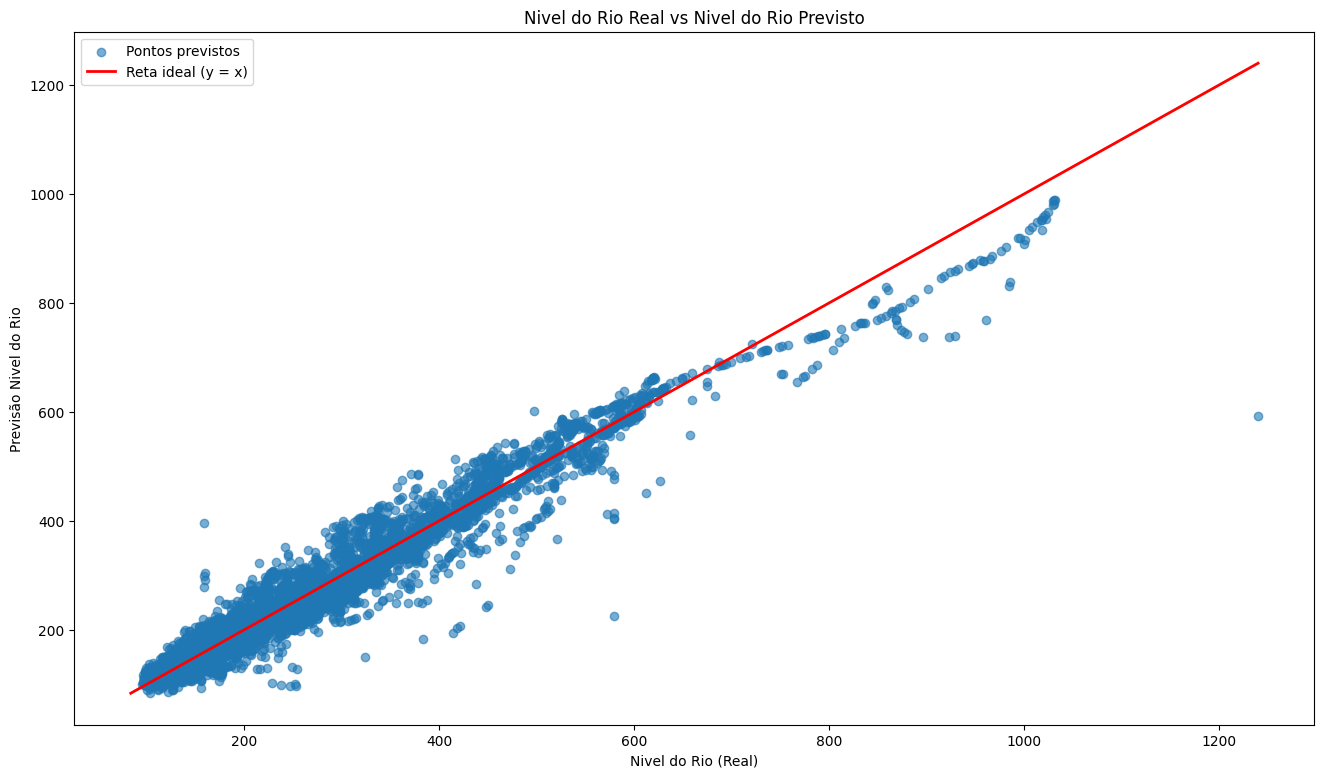

In [32]:
plt.figure(figsize=(16, 9))
plt.scatter(y_test, previsao, label='Pontos previstos', alpha=0.6)

min_val = min(min(y_test), min(previsao))
max_val = max(max(y_test), max(previsao))
x_line = np.linspace(min_val, max_val, 100)
y_line = x_line 

plt.plot(x_line, y_line, color='red', label='Reta ideal (y = x)', linewidth=2)

plt.xlabel('Nivel do Rio (Real)')
plt.ylabel('Previsão Nivel do Rio')
plt.title('Nivel do Rio Real vs Nivel do Rio Previsto')
plt.legend()
plt.show()

## Subset 3

In [33]:
x = dataset[['ChuvaItuporanaga', 'ChuvaTaio']]
y = dataset['NivelRiodoSul']
x_minmax = scaler.fit_transform(x)
x_train, x_test, y_train, y_test  = train_test_split(x_minmax, y, train_size = 0.8, random_state=42)

In [34]:
regressao = LinearRegression()
regressao.fit(x_train, y_train)
makeJoblib(regressao, "only_chuva")

In [35]:
previsao = regressao.predict(x_test)

In [36]:
print("Coeficientes:", regressao.coef_)
print("Intercepto:", regressao.intercept_)

Coeficientes: [469.2786153    3.92765502]
Intercepto: 244.61856296799286


### Avaliação do modelo

In [37]:
r2_score(y_test, previsao)

0.0010827085760268806

In [38]:
mean_absolute_error(y_test, previsao)

103.02992793911037

In [39]:
np.sqrt(mean_squared_error(y_test, previsao))

np.float64(139.57669751186899)

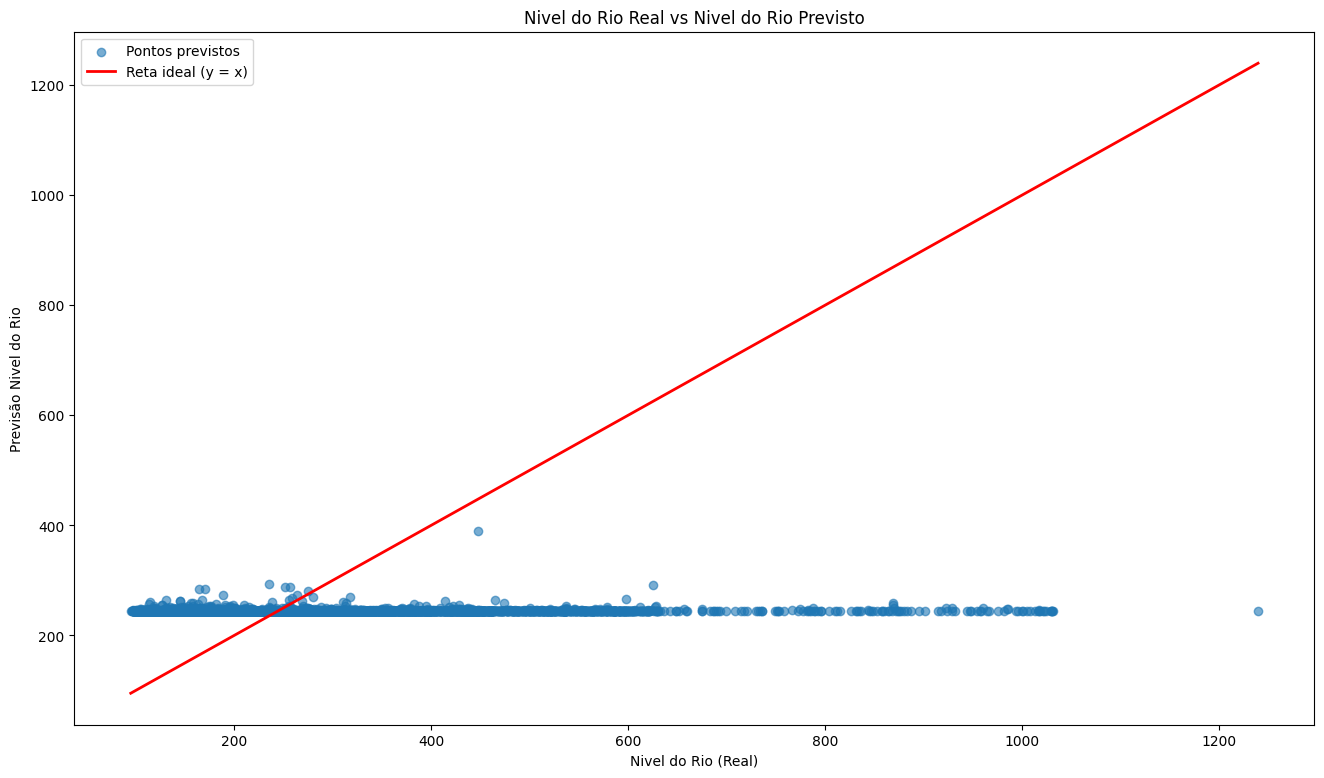

In [40]:
plt.figure(figsize=(16, 9))
plt.scatter(y_test, previsao, label='Pontos previstos', alpha=0.6)

min_val = min(min(y_test), min(previsao))
max_val = max(max(y_test), max(previsao))
x_line = np.linspace(min_val, max_val, 100)
y_line = x_line 

plt.plot(x_line, y_line, color='red', label='Reta ideal (y = x)', linewidth=2)

plt.xlabel('Nivel do Rio (Real)')
plt.ylabel('Previsão Nivel do Rio')
plt.title('Nivel do Rio Real vs Nivel do Rio Previsto')
plt.legend()
plt.show()

## Subset 4

In [41]:
x = dataset[['NivelTaio', 'ChuvaTaio']]
y = dataset['NivelRiodoSul']
x_minmax = scaler.fit_transform(x)
x_train, x_test, y_train, y_test  = train_test_split(x_minmax, y, train_size = 0.8, random_state=42)

In [42]:
regressao = LinearRegression()
regressao.fit(x_train, y_train)
makeJoblib(regressao, "only_taio")

In [43]:
previsao = regressao.predict(x_test)

In [44]:
print("Coeficientes:", regressao.coef_)
print("Intercepto:", regressao.intercept_)

Coeficientes: [730.89679426 247.01942318]
Intercepto: 104.88664461261115


### Avaliação do modelo

In [45]:
r2_score(y_test, previsao)

0.8788552760834131

In [46]:
mean_absolute_error(y_test, previsao)

30.12959753150443

In [47]:
np.sqrt(mean_squared_error(y_test, previsao))

np.float64(48.607177702537406)

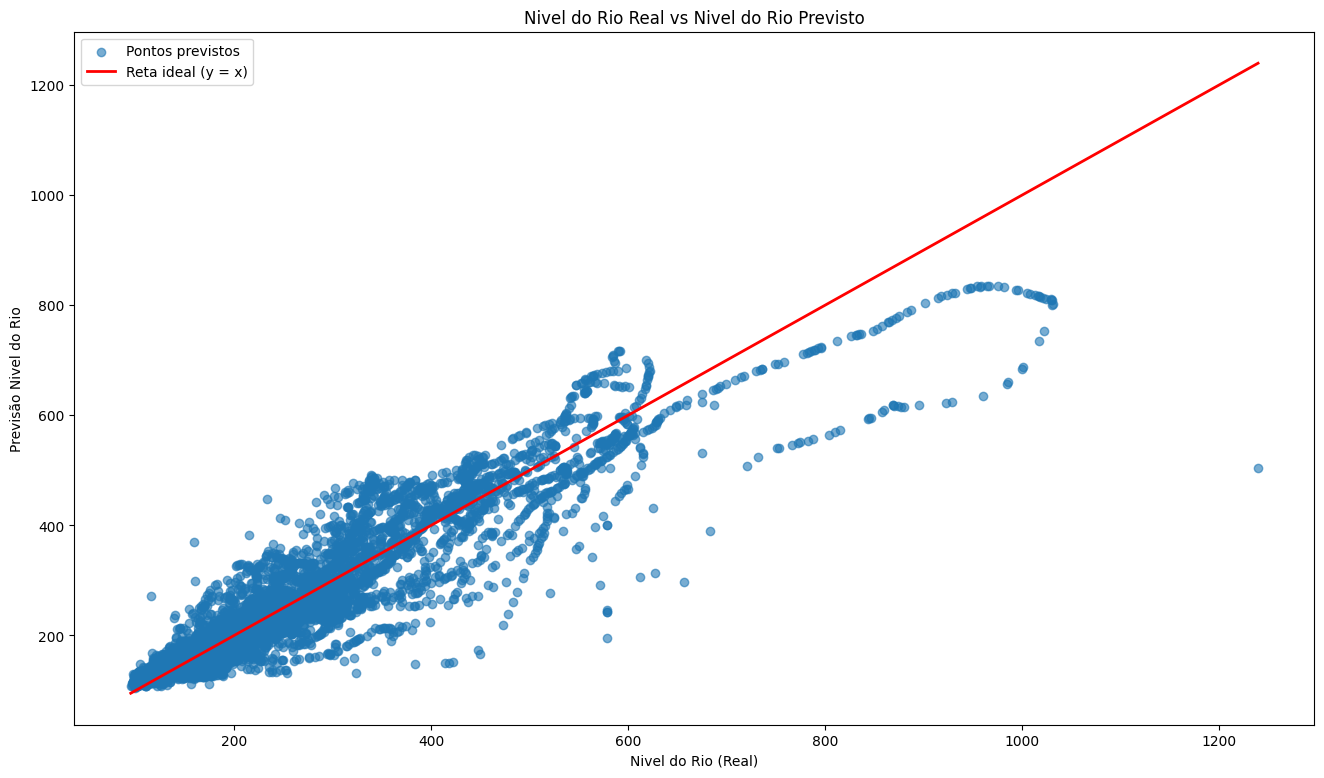

In [48]:
plt.figure(figsize=(16, 9))
plt.scatter(y_test, previsao, label='Pontos previstos', alpha=0.6)

min_val = min(min(y_test), min(previsao))
max_val = max(max(y_test), max(previsao))
x_line = np.linspace(min_val, max_val, 100)
y_line = x_line 

plt.plot(x_line, y_line, color='red', label='Reta ideal (y = x)', linewidth=2)

plt.xlabel('Nivel do Rio (Real)')
plt.ylabel('Previsão Nivel do Rio')
plt.title('Nivel do Rio Real vs Nivel do Rio Previsto')
plt.legend()
plt.show()

## Subset 5

In [49]:
x = dataset[['NivelItuporanga', 'ChuvaItuporanaga']]
y = dataset['NivelRiodoSul']
x_minmax = scaler.fit_transform(x)
x_train, x_test, y_train, y_test  = train_test_split(x_minmax, y, train_size = 0.8, random_state=42)

In [50]:
regressao = LinearRegression()
regressao.fit(x_train, y_train)
makeJoblib(regressao, "only_itu")

In [51]:
previsao = regressao.predict(x_test)

In [52]:
print("Coeficientes:", regressao.coef_)
print("Intercepto:", regressao.intercept_)

Coeficientes: [1412.02861793  147.90012183]
Intercepto: 65.42963487917228


### Avaliação do modelo

In [53]:
r2_score(y_test, previsao)

0.8193544890202676

In [54]:
mean_absolute_error(y_test, previsao)

42.75628025496359

In [55]:
np.sqrt(mean_squared_error(y_test, previsao))

np.float64(59.35560552521062)

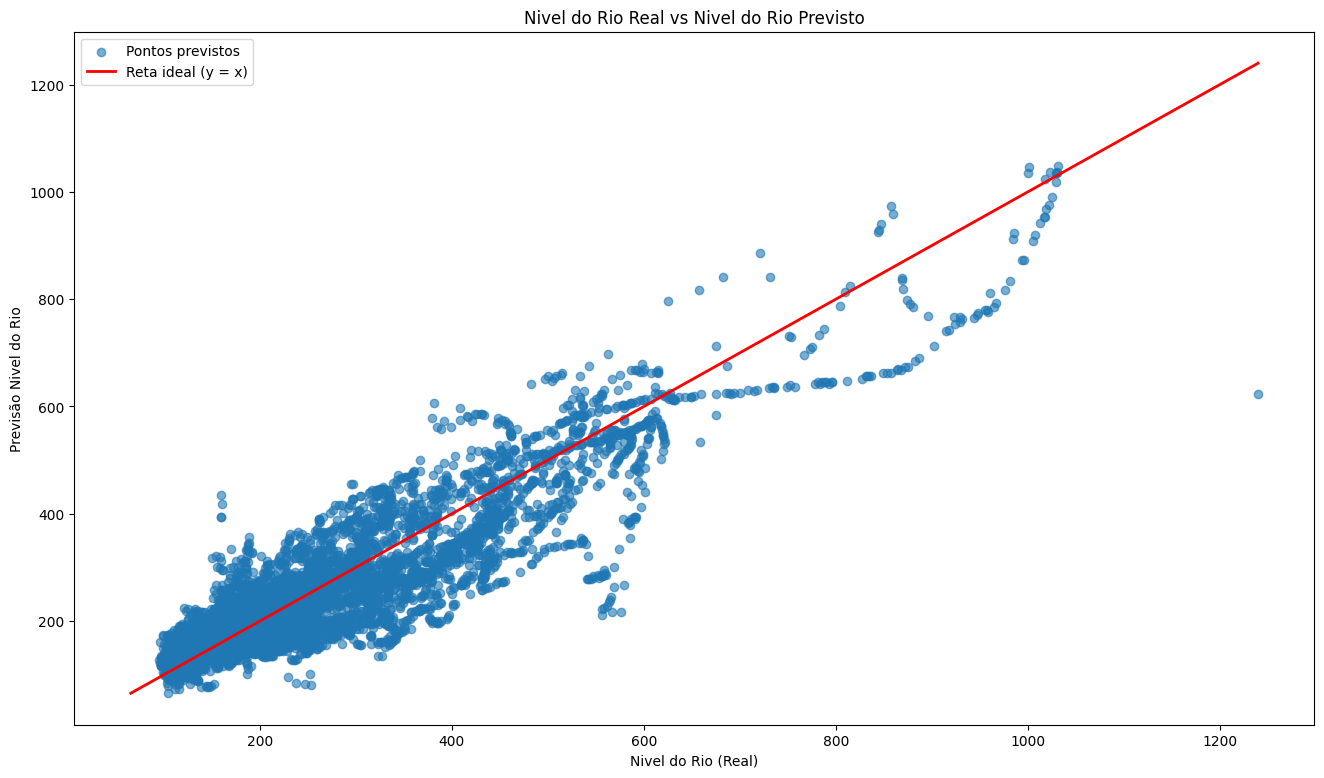

In [56]:
plt.figure(figsize=(16, 9))
plt.scatter(y_test, previsao, label='Pontos previstos', alpha=0.6)

min_val = min(min(y_test), min(previsao))
max_val = max(max(y_test), max(previsao))
x_line = np.linspace(min_val, max_val, 100)
y_line = x_line 

plt.plot(x_line, y_line, color='red', label='Reta ideal (y = x)', linewidth=2)

plt.xlabel('Nivel do Rio (Real)')
plt.ylabel('Previsão Nivel do Rio')
plt.title('Nivel do Rio Real vs Nivel do Rio Previsto')
plt.legend()
plt.show()

# Análise dos resultados

## 1. Tabela de dados

Segue abaixo a tabela de referência dos dados e em gráficos para auxiliar a compreensão. 

| Modelo             | Campos Utilizados                                       | R²     | MAE    | RMSE   |
| ------------------ | ------------------------------------------------------- | ------ | ------ | ------ |
| Todos os campos    | NivelItuporanga, ChuvaItuporanaga, NivelTaio, ChuvaTaio | 0.9571 | 18.30  | 28.92  |
| Somente níveis     | NivelItuporanga, NivelTaio                              | 0.9567 | 18.37  | 29.06  |
| Somente chuva      | ChuvaItuporanaga, ChuvaTaio                             | 0.0011 | 103.03 | 139.58 |
| Somente Taió       | NivelTaio, ChuvaTaio                                    | 0.8789 | 30.13  | 48.61  |
| Somente Ituporanga | NivelItuporanga, ChuvaItuporanaga                       | 0.8194 | 42.76  | 59.36  |

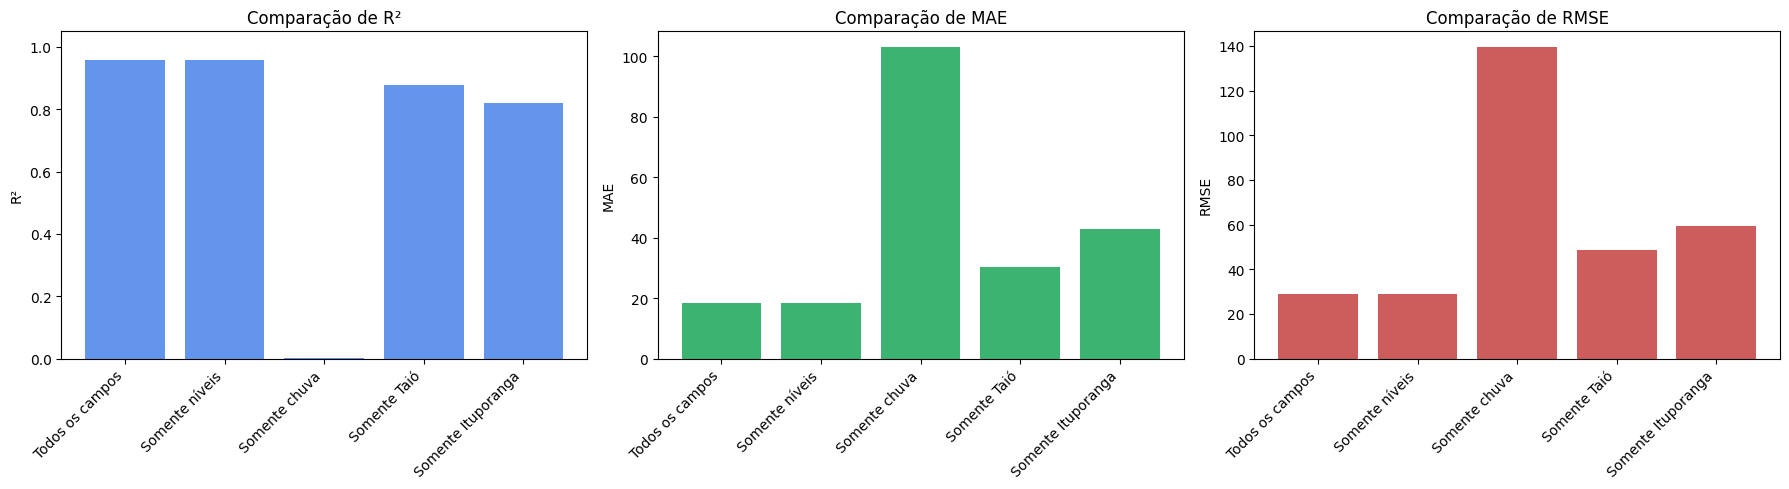

In [58]:
modelos = ['Todos os campos', 'Somente níveis', 'Somente chuva', 'Somente Taió', 'Somente Ituporanga']
campos = [
    ['NivelItuporanga', 'ChuvaItuporanaga', 'NivelTaio', 'ChuvaTaio'],
    ['NivelItuporanga', 'NivelTaio'],
    ['ChuvaItuporanaga', 'ChuvaTaio'],
    ['NivelTaio', 'ChuvaTaio'],
    ['NivelItuporanga', 'ChuvaItuporanaga']
]
r2_scores = [0.9571, 0.9567, 0.0011, 0.8789, 0.8194]
maes = [18.30, 18.37, 103.03, 30.13, 42.76]
rmses = [28.92, 29.06, 139.58, 48.61, 59.36]

df_resultados = pd.DataFrame({
    'Modelo': modelos,
    'Campos utilizados': campos,
    'R²': r2_scores,
    'MAE': maes,
    'RMSE': rmses
})

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.bar(modelos, r2_scores, color='cornflowerblue')
plt.title('Comparação de R²')
plt.ylabel('R²')
plt.ylim(0, 1.05)
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 2)
plt.bar(modelos, maes, color='mediumseagreen')
plt.title('Comparação de MAE')
plt.ylabel('MAE')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 3)
plt.bar(modelos, rmses, color='indianred')
plt.title('Comparação de RMSE')
plt.ylabel('RMSE')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


## 2. Avaliação Global do Modelo com Todas as Variáveis

O uso conjunto de todos os atributos apresenta excelente desempenho preditivo, com R² de aproximadamente 95,7%, indicando que o modelo consegue explicar grande parte da variabilidade do nível do rio. Os erros (MAE e RMSE) também são baixos, sugerindo previsões bastante próximas dos valores reais. Notam-se pesos elevados para os níveis dos rios, com destaque ao nível de Ituporanga, o que reforça sua importância como preditor.

## 3. Avaliação Global do Modelo com Somente os Níveis   

Ao utilizar exclusivamente os níveis dos rios, o desempenho se mantém praticamente inalterado em relação ao modelo completo. Isso evidencia que a variável chuva possui impacto secundário na previsão imediata, sendo os níveis históricos os principais fatores de correlação.

## 4. Avaliação Global do Modelo com Somente as Chuvas

Neste cenário, o desempenho é extremamente insatisfatório. O valor de R² próximo de zero indica ausência de correlação linear significativa entre os volumes de chuva isolados e o nível do rio. Além disso, os altos valores de MAE e RMSE confirmam que a chuva, por si só, não é um bom preditor imediato do nível do rio, possivelmente devido a atrasos hidrológicos entre precipitação e aumento no nível do curso d’água.

## 5. Avaliação Global do Modelo com Somente as Variáveis de Taió

Este modelo apresenta desempenho sólido, embora inferior ao modelo completo. O coeficiente de R² indica que Taió possui contribuição significativa para a previsão, sendo o nível da cidade de Taió o principal fator, como evidenciado pelo peso elevado do coeficiente.

## 6. Avaliação Global do Modelo com Somente as Variáveis de Ituporanga

Embora o nível de Ituporanga tenha alto peso no modelo, seu uso isolado resulta em menor desempenho em relação a Taió, especialmente quanto ao erro absoluto médio. Ainda assim, o R² de 81,9% é representativo, demonstrando que Ituporanga também possui forte influência local sobre o nível do Rio do Sul.

## 7. Conclusão

O modelo que utiliza todos os quatro atributos apresenta o melhor desempenho preditivo, validando a escolha por uma abordagem multivariada. No entanto, a diferença de desempenho em relação ao modelo que utiliza apenas os níveis dos rios é pequena, enquanto o custo computacional da abordagem completa é consideravelmente maior. Dessa forma, o uso exclusivo dos níveis já se mostra eficiente, oferecendo um bom equilíbrio entre precisão e economia de recursos.

Os níveis dos rios são os fatores mais relevantes para a previsão do nível do Rio do Sul. Mesmo sem considerar as chuvas, o modelo mantém alto desempenho, o que evidencia sua forte correlação com a variável de interesse.

Por outro lado, as chuvas, quando usadas isoladamente, não apresentam boa capacidade preditiva no contexto de modelos lineares. Isso sugere que sua influência pode depender de defasagens temporais ou relações não lineares, exigindo abordagens mais sofisticadas para serem bem aproveitadas.

Entre as localidades analisadas, os dados de Taió demonstram maior poder preditivo do que os de Ituporanga quando considerados de forma individual, o que reforça sua relevância para o modelo.

Embora os resultados obtidos até o momento indiquem que os níveis dos rios são os principais preditores do nível do Rio do Sul e que o modelo multivariado apresente desempenho satisfatório, é importante destacar que a validação definitiva da capacidade preditiva do modelo requer testes adicionais.

Esses testes devem incluir não apenas diferentes conjuntos de dados e condições climáticas, mas também a incorporação de variáveis mais complexas, como defasagens temporais, umidade do solo, temperatura, uso do solo e topografia, que podem exercer influência significativa sobre o comportamento hidrológico da bacia.

Além disso, a avaliação do modelo em cenários extremos e sua robustez frente a eventos atípicos são etapas fundamentais para assegurar sua confiabilidade em aplicações reais, como sistemas de alerta e tomada de decisão em gestão hídrica.